# Top Hits Spotify - Supervised Learning
## Work Specification
The main purpose of this project was to learn how to classify exaamples in terms of the concept under analysis given a dataset, using <b>Supervised Learning</b>.
<br>
We were given a dataset regarding the top spotify hits from 2000 to 2019 and our goal was to develop a model which will take in the attributes of a certain music track and predict its popularity.

## Group 12_1B
- André Flores - up201907001
- Diogo Faria - up201907014
- Tiago Rodrigues - up201906807


## Importing the Dataset

In [1]:
import pandas as pd
#import warnings

#warnings.filterwarnings('ignore')

top_hits = pd.read_csv('..\docs\songs_normalize.csv')

### Attributes

- **artist:** Name of the Artist.
- **song:** Name of the Track.
- **duration_ms:** Duration of the track in milliseconds.
- **explicit:** The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.
- **year:** Release Year of the track.
- **popularity:** The higher the value the more popular the song is.
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
- **key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- **loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
- **mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- **genre:** Genre of the track.

In [23]:
top_hits.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000014,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


## Data pre-processing

### Error Data
First we checked for null values:

In [ ]:
top_hits.isnull().any().sum()

As there were no null values, we checked the data itself, and found that certain values of the column 'genre' had the value 'set()', which was an error, so those rows of data were removed:

In [ ]:
top_hits = top_hits[top_hits.genre != "set()"]

### Outliers
To check for outliers, we looked at a scatterplot matrix, though we had to temporarily remove some data since pairplot method won't be able to handle any non-numerical values.
Thus, we removed the columns that had objects or booleans:

In [14]:
top_hits_scatter = top_hits.copy()
for col in top_hits_scatter.columns:
    if top_hits_scatter[col].dtype in ["object", "bool"]:
        top_hits_scatter = top_hits_scatter.drop(columns=[col], axis=1)

top_hits_scatter.head()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,211160,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053
1,167066,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726
2,250546,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859
3,224493,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000014,0.3470,0.544,119.992
4,200560,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656


After the data was changed, we were able to get the scatterplot matrix:

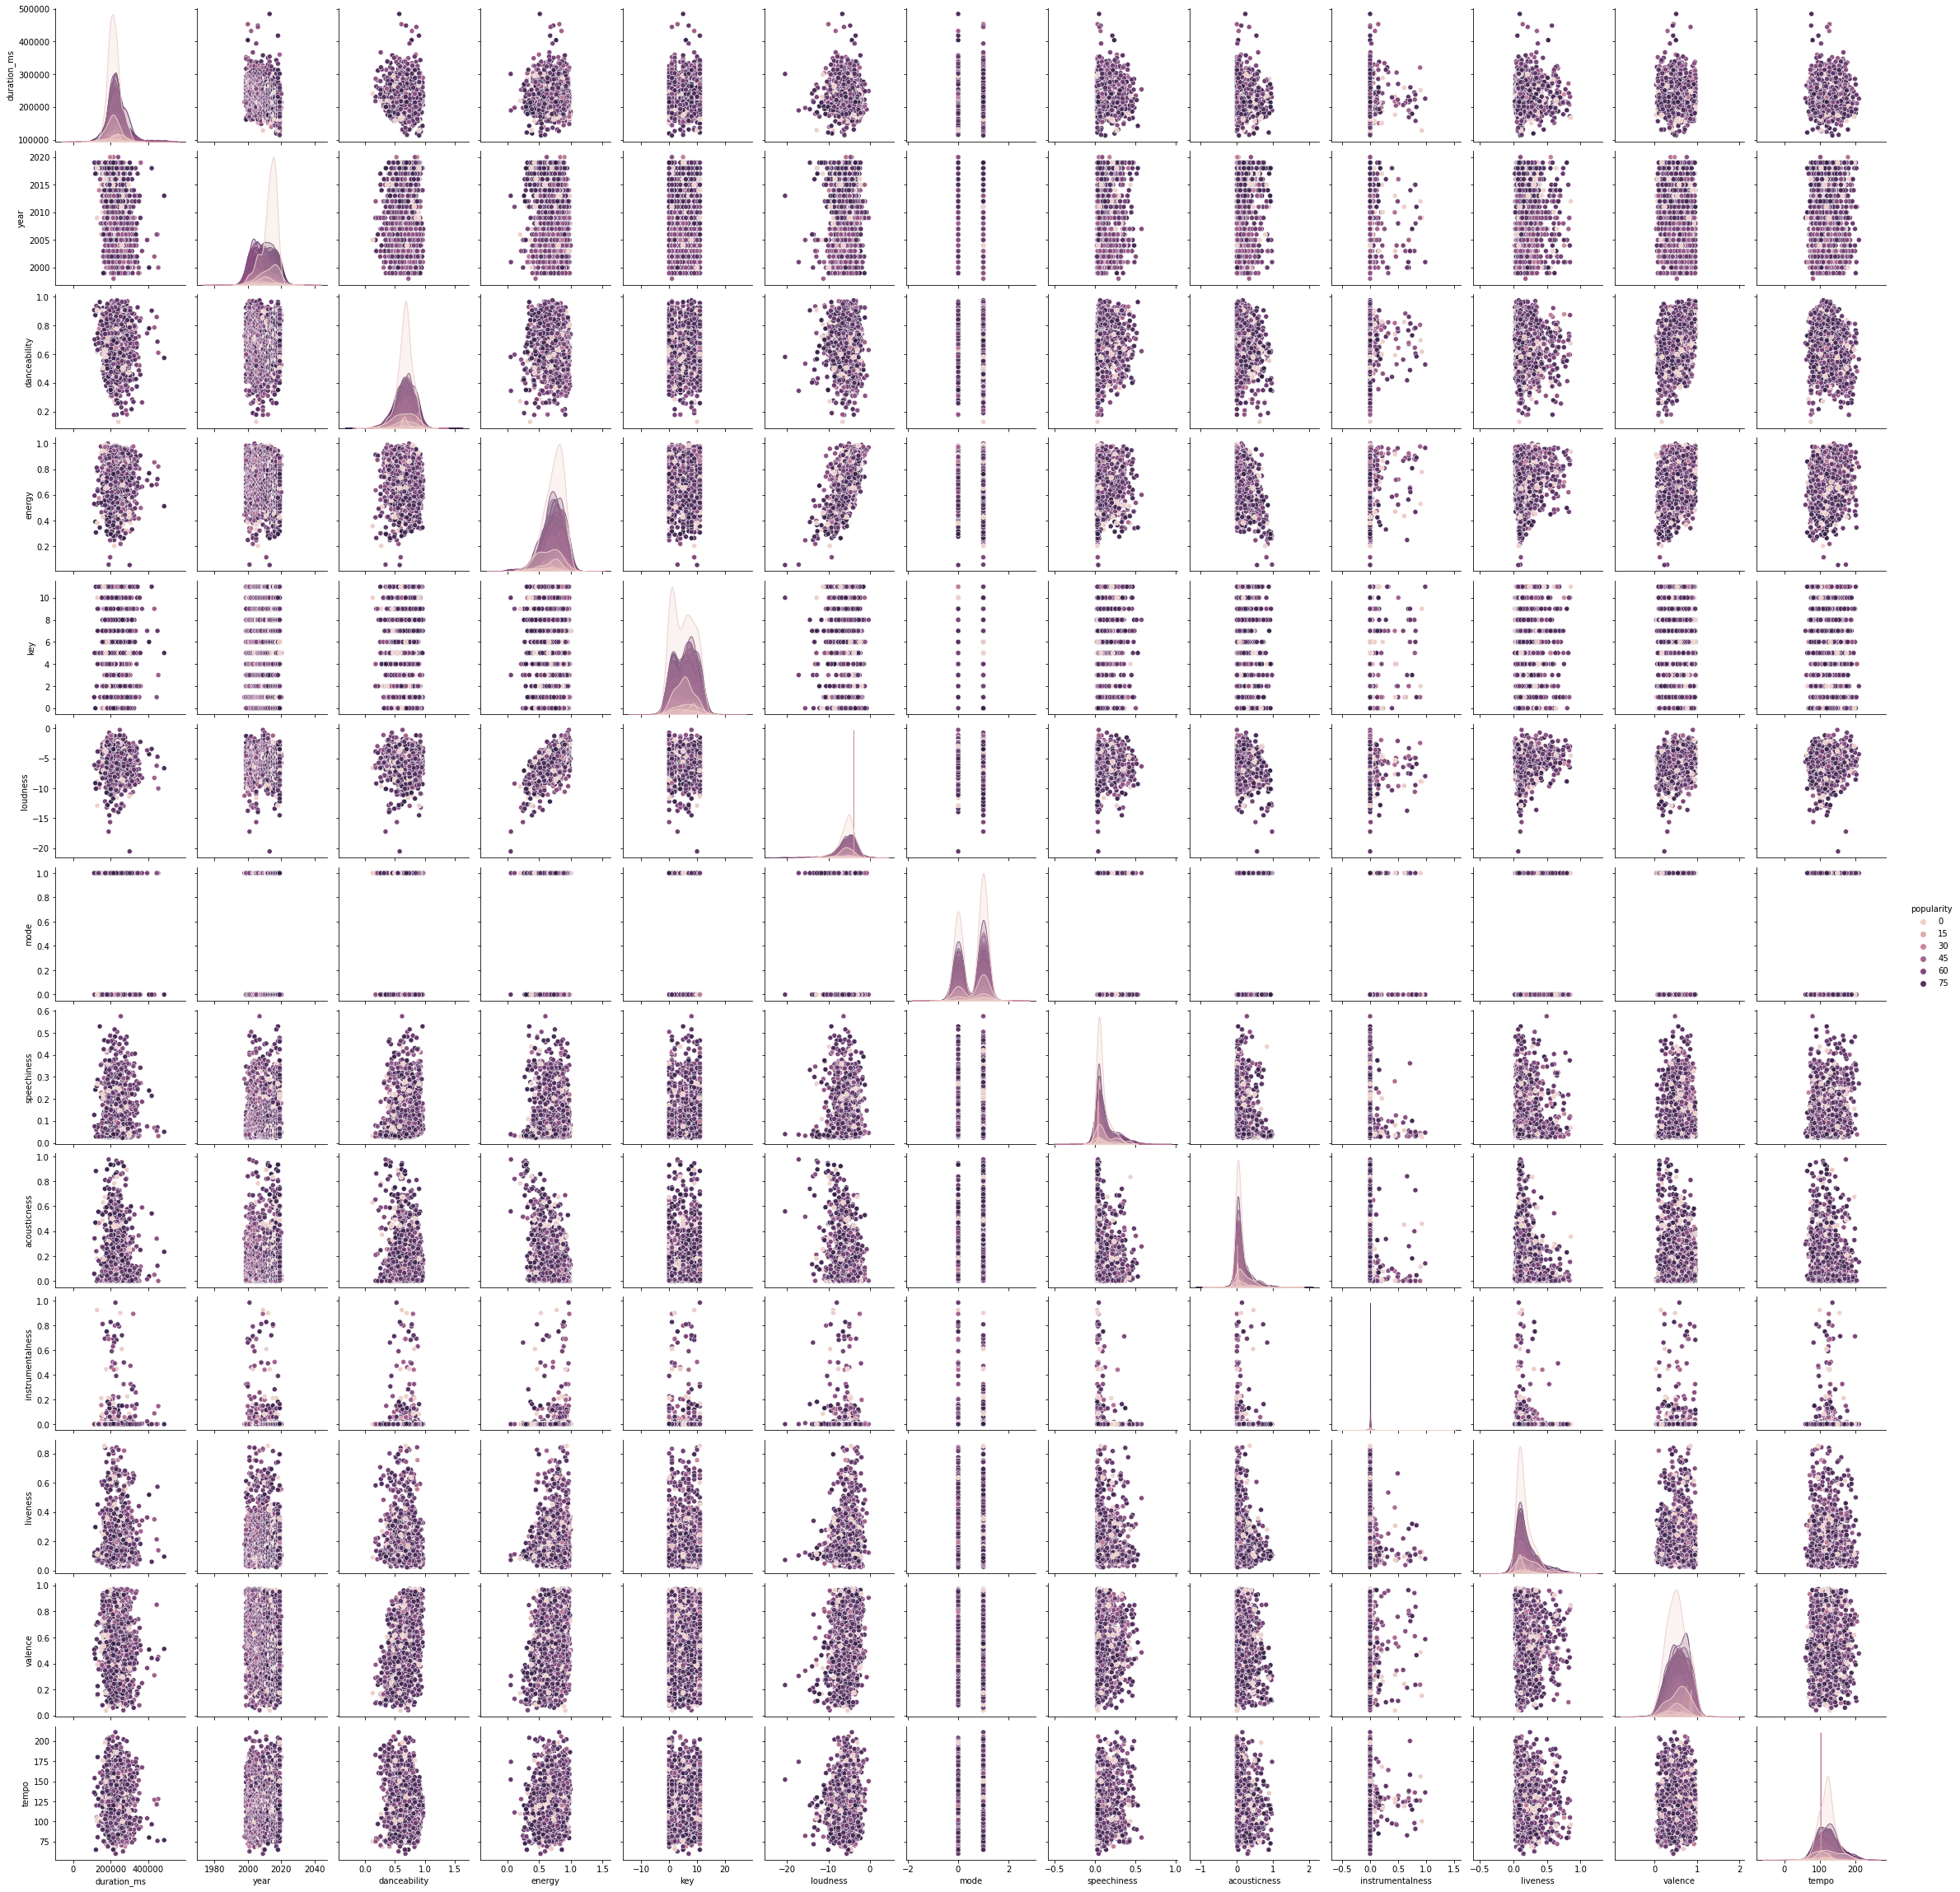

In [17]:
sb.pairplot(top_hits_scatter, hue='popularity')

### Exploratory analysis
We checked for correlation between the attributes themselves and to the 'popularity' attribute:

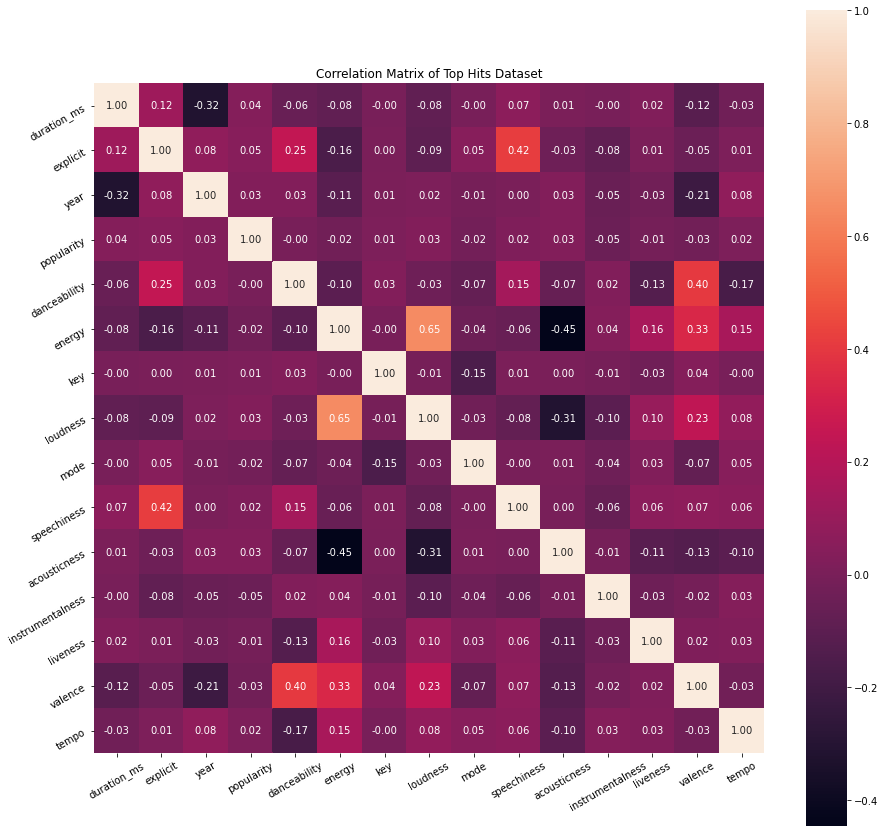

In [5]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sb

le = preprocessing.LabelEncoder()
le.fit(top_hits['popularity'])
top_hits['popularity'] = le.transform(top_hits['popularity'])
corr_matrix = top_hits.corr()

plt.figure(figsize=(15,15))
plt.title('Correlation Matrix of Top Hits Dataset')
a = sb.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

With the resulting matrix, we could check the highest correlations from extracting the values from the top right triangle, since it was a mirrored matrix, and found that the highest correlation was of only 0.65.
Since the highest correlation was only 0.65, we decided to aggregate no attributes.